# Install Dependencies

## External Dependencies

In [12]:
!pip install python-telegram-bot matplotlib prettytable pandas beautifulsoup4 yfinance expiringdict easy_equities_client frostaura


[notice] A new release of pip available: 22.2.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


## FrostAura Dependencies

In [13]:
import os
import sys

USE_LOCAL_CODE: bool = True # NOTE: When changing this configuration, be sure to restart the interpreter in order to have sys path updates reflect.
directories_to_move_up: int = 2
current_executing_path: str = os.getcwd()
current_executing_path = current_executing_path.replace('\\', '/')
root_path: str = '/'.join(current_executing_path.split('/')[:-directories_to_move_up])

# Clean up.
%pip uninstall frostaura.intelligence.zeus -y
sys.path = [p for p in sys.path if p != root_path]

if USE_LOCAL_CODE:
    sys.path.append(root_path)
else:
    %pip install -U --no-cache-dir frostaura.intelligence.zeus

Note: you may need to restart the kernel to use updated packages.


# Import Dependencies

In [14]:
from frostaura.data_access import INotificationsDataAccess
from frostaura.data_access import TelegramNotificationsDataAccess
from zeus.data_access import IModalitiesDataAccess
from zeus.data_access import TelegramModalitiesDataAccess
from telegram import Update
import uuid
import matplotlib.pyplot as plt
import pandas as pd

# Usage

In [15]:
os.environ['telegram_bot_token'] = '5535601062:AAHQRQ2EDXOrioMsPd32ouaDFZCXqjzkeTU'
os.environ['telegram_chat_id'] = '1551490751'

In [ ]:
config: dict = {}
bot_token = os.environ.get('telegram_bot_token')
personal_chat_id = os.environ.get('telegram_chat_id')
instance: INotificationsDataAccess = TelegramNotificationsDataAccess(bot_token=bot_token,
                                                                     chat_id=personal_chat_id)

## Sending

In [17]:
instance.send_text('Hello ***World!***')

Error while getting Updates: Unauthorized
No error handlers are registered, logging exception.
Traceback (most recent call last):
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/ext/updater.py", line 651, in _network_loop_retry
    if not action_cb():
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/ext/updater.py", line 602, in polling_action_cb
    updates = self.bot.get_updates(
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/ext/extbot.py", line 226, in get_updates
    updates = super().get_updates(
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/bot.py", line 133, in decorator
    result = func(*args, **kwargs)
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/bot.py", line 3057, in get_updates
    self._post(
  File "

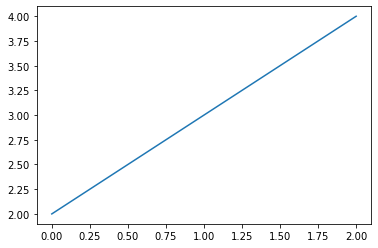

In [18]:
fig = plt.plot([2,3,4])[0].get_figure()

instance.send_figure(figure=fig)

In [19]:
df: pd.DataFrame = pd.DataFrame({
    'Col 1': [
        'Col 1 > Row 1',
        'Col 1 > Row 2'
    ],
    'Col 2': [
        'Col 2 > Row 1',
        'Col 2 > Row 2'
    ]
})

instance.send_dataframe(dataframe=df)

## Receiving

In [20]:
modalities_data_access: IModalitiesDataAccess = TelegramModalitiesDataAccess()

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [23]:
def on_message(update: Update, context) -> None:
    message = update.message
    sender = message.from_user
    sender_full_name: str = f'{sender.first_name} {sender.last_name}'
    files_to_process: list = []

    voice = message.voice
    if voice is not None:
        filename: str = str(uuid.uuid4())
        filepath: str = f'/Users/deanmartin/Source/fa.intelligence.notebooks/src/data/voicenote_{filename}.mp3'
        files_to_process.append(filepath)
        file = context.bot.get_file(voice.file_id)
        file.download(filepath)
        transcription: str = modalities_data_access.sound_file_to_text(filepath)

        context.bot.send_message(
            chat_id=personal_chat_id,
            reply_to_message_id=message.message_id,
            text=f'{sender_full_name} (Voice): {transcription}'
        )
        print(f'{sender_full_name} (Voice): {transcription}')

    photos = message.photo
    if photos is not None and len(photos) > 0:
        filename: str = str(uuid.uuid4())
        photo = photos[-2]
        filepath: str = f'/Users/deanmartin/Source/fa.intelligence.notebooks/src/data/photo_{filename}_{photo.width}x{photo.height}.png'
        files_to_process.append(filepath)
        file = context.bot.get_file(photo.file_id)
        file.download(filepath)
        text: str = modalities_data_access.image_file_to_text(filepath)

        context.bot.send_message(
            chat_id=personal_chat_id,
            reply_to_message_id=message.message_id,
            text=f'{sender_full_name} (Photo): {text}'
        )
        print(f'{sender_full_name} (Photo): {text}')

    text: str = message.text
    if text is not None:
        context.bot.send_message(
            chat_id=personal_chat_id,
            reply_to_message_id=message.message_id,
            text=f'{sender_full_name} (Text): {text}'
        )
        print(f'{sender_full_name} (Text): {text}')

    # TODO: After processing everything to text, construct a modalities prompt.

instance.message_handler = on_message

Dean Martin (Photo): [{'generated_text': 'a man and a woman are standing in front of a mirror '}]


Error while getting Updates: Unauthorized
No error handlers are registered, logging exception.
Traceback (most recent call last):
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/ext/updater.py", line 651, in _network_loop_retry
    if not action_cb():
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/ext/updater.py", line 602, in polling_action_cb
    updates = self.bot.get_updates(
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/ext/extbot.py", line 226, in get_updates
    updates = super().get_updates(
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/bot.py", line 133, in decorator
    result = func(*args, **kwargs)
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/bot.py", line 3057, in get_updates
    self._post(
  File "

In [ ]:
instance.__exit__(exc_type=None, exc_value=None, t_b=None)

Error while getting Updates: Unauthorized
No error handlers are registered, logging exception.
Traceback (most recent call last):
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/ext/updater.py", line 651, in _network_loop_retry
    if not action_cb():
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/ext/updater.py", line 602, in polling_action_cb
    updates = self.bot.get_updates(
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/ext/extbot.py", line 226, in get_updates
    updates = super().get_updates(
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/bot.py", line 133, in decorator
    result = func(*args, **kwargs)
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/bot.py", line 3057, in get_updates
    self._post(
  File "